In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import pandas as pd
data = pd.read_csv('drive/My Drive/data_heart_new.csv')
data

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Risk of accute condition
0,0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [6]:
renaming = {
    'age': 'Возраст',
    'anaemia': 'Анемия',
    'creatinine_phosphokinase': 'Креатиназа',
    'diabetes': 'Диабет',
    'ejection_fraction': 'Фракция выброса',
    'high_blood_pressure': 'Высокое кровяное давление',
    'platelets': 'Тромбоциты',
    'serum_creatinine': 'Креатин',
    'serum_sodium': 'Натрий',
    'sex': 'Пол',
    'smoking': 'Курение',
    'time': 'Время',
    'Risk of accute condition': 'Фактор риска'    
}
data = data.rename(columns=renaming)
data

,Возраст,Анемия,Креатиназа,Диабет,Фракция выброса,Высокое кровяное давление,Тромбоциты,Креатин,Натрий,Пол,Курение,Время,Фактор риска
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
data['Натрий'].median()

137.0

In [9]:
data.isnull().sum()

Возраст                      0
Анемия                       0
Креатиназа                   0
Диабет                       0
Фракция выброса              0
Высокое кровяное давление    0
Тромбоциты                   0
Креатин                      0
Натрий                       0
Пол                          0
Курение                      0
Время                        0
Фактор риска                 0
dtype: int64

In [10]:
data.shape

(299, 13)

In [11]:
data.drop_duplicates().shape

(299, 13)

Наша главная переменная (цель) - Фактор риска, то есть вероятность обострения болезни

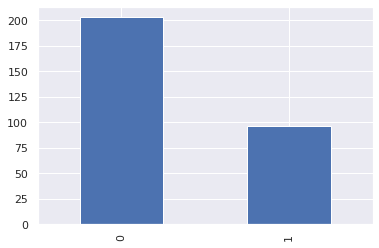

In [12]:
data['Фактор риска'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Вероятность острого ухудшения болезни с возрастом')

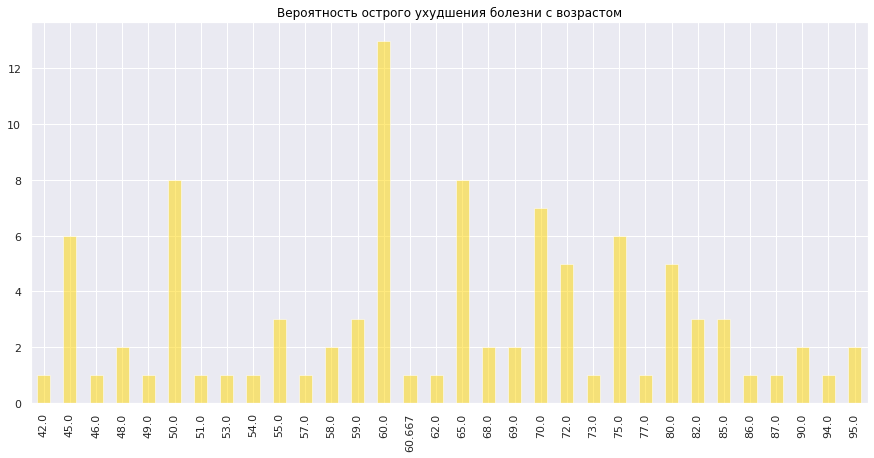

In [13]:
plt.figure(figsize=(15, 7))
data[data['Фактор риска']==1]['Возраст'].value_counts().sort_index().plot(kind='bar', alpha=0.5, color = 'gold')
plt.title('Вероятность острого ухудшения болезни с возрастом', color = 'black')

Процентное соотношение курящих и не курящих в острой стадии

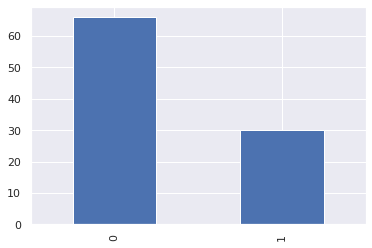

In [14]:
data['Курение'][data['Фактор риска']==1].value_counts().plot(kind='bar')

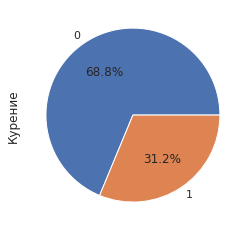

In [15]:
smok = data[data['Фактор риска']==1].groupby('Курение')['Курение'].count()
smok.plot.pie(autopct="%.1f%%")

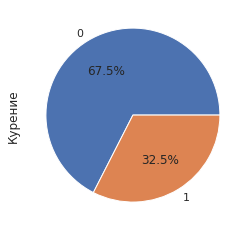

In [16]:
smok = data[data['Фактор риска']==0].groupby('Курение')['Курение'].count()
smok.plot.pie(autopct="%.1f%%")

Процентное соотношение диабетиков и не диабетиков в острой стадии

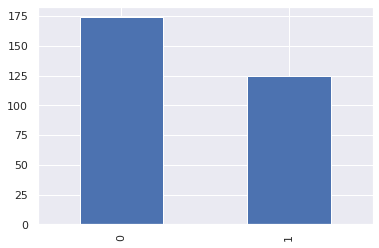

In [17]:
data['Диабет'].value_counts().plot(kind='bar')

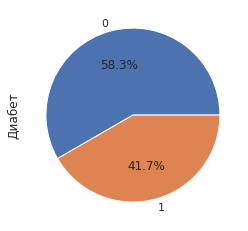

In [18]:
diab = data[data['Фактор риска']==1].groupby('Диабет')['Диабет'].count()
diab.plot.pie(autopct="%.1f%%")

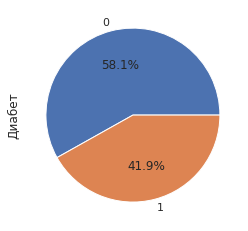

In [19]:
diab = data[data['Фактор риска']==0].groupby('Диабет')['Диабет'].count()
diab.plot.pie(autopct="%.1f%%")

Процентное соотношение людей с высоким кровяным давлением и без него в острой стадии

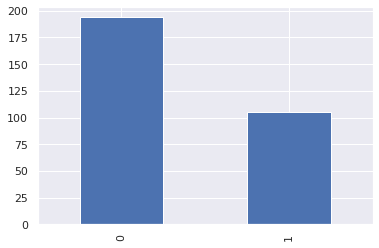

In [20]:
data['Высокое кровяное давление'].value_counts().plot(kind='bar')

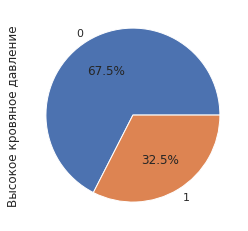

In [21]:
hbp = data[data['Фактор риска']==0].groupby('Высокое кровяное давление')['Высокое кровяное давление'].count()
hbp.plot.pie(autopct="%.1f%%")

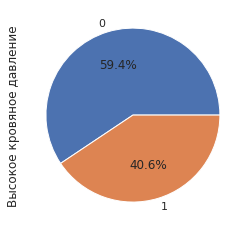

In [22]:
hbp = data[data['Фактор риска']==1].groupby('Высокое кровяное давление')['Высокое кровяное давление'].count()
hbp.plot.pie(autopct="%.1f%%")

Процентное соотношение людей с анемией и без неё в острой стадии

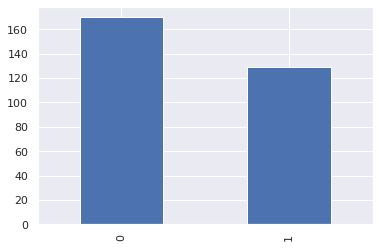

In [23]:
data['Анемия'].value_counts().plot(kind='bar')

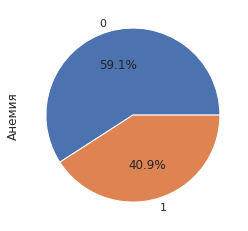

In [24]:
anaemia = data[data['Фактор риска']==0].groupby('Анемия')['Анемия'].count()
anaemia.plot.pie(autopct="%.1f%%")

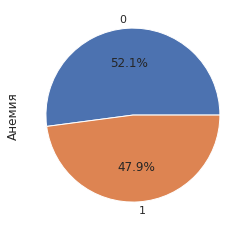

In [25]:
anaemia = data[data['Фактор риска']==1].groupby('Анемия')['Анемия'].count()
anaemia.plot.pie(autopct="%.1f%%")

Процентное соотношение женщин и мужчин в острой стадии

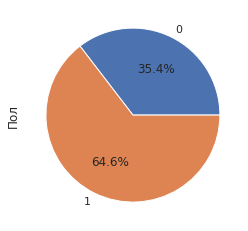

In [26]:
gender = data[data['Фактор риска']==1].groupby('Пол')['Пол'].count()
gender.plot.pie(autopct="%.1f%%")

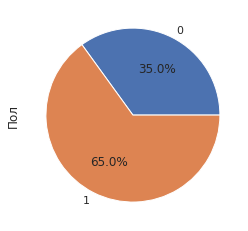

In [27]:
gender = data[data['Фактор риска']==0].groupby('Пол')['Пол'].count()
gender.plot.pie(autopct="%.1f%%")

Text(0.5, 1.0, 'Вероятность острого ухудшения болезни с временем от начала болезни')

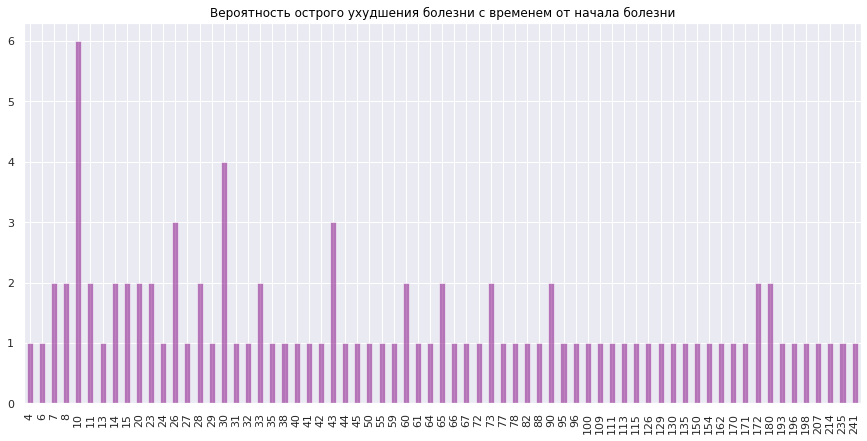

In [28]:
plt.figure(figsize=(15, 7))
data[data['Фактор риска']==1]['Время'].value_counts().sort_index().plot(kind='bar', alpha=0.5, color = 'purple')
plt.title('Вероятность острого ухудшения болезни с временем от начала болезни', color = 'black')

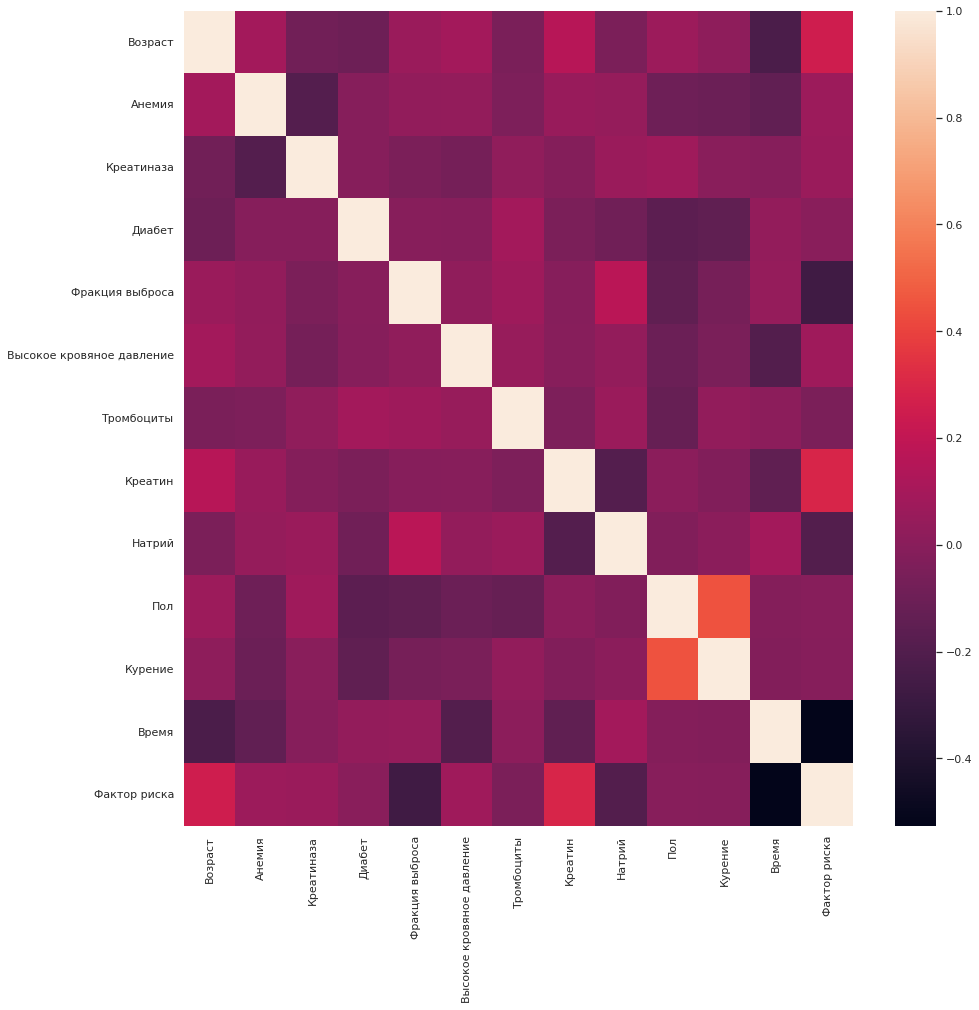

In [29]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

1-й метод - дерево

In [31]:
x = data.drop(['Фактор риска'], axis=1)
y = data['Фактор риска']

from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)
tree_prediction = tree.predict(x_test)

print('accuracy_score', accuracy_score(y_test, tree_prediction))
print('precision_score', precision_score(y_test, tree_prediction))
print('recall_score', recall_score(y_test, tree_prediction))
print('f1_score', f1_score(y_test, tree_prediction, average='macro'))

accuracy_score 0.6555555555555556
precision_score 0.6
recall_score 0.4864864864864865
f1_score 0.6314885748249901


Ищем значения, которые почти не влияют на предсказание, исключаем их из рассмотрения и делаем предсказание без них

In [32]:
tree_importance = tree.feature_importances_
pd.Series(data=tree_importance, index=x.columns)

Возраст                      0.034543
Анемия                       0.000000
Креатиназа                   0.079737
Диабет                       0.000000
Фракция выброса              0.056885
Высокое кровяное давление    0.000000
Тромбоциты                   0.079477
Креатин                      0.108846
Натрий                       0.077932
Пол                          0.000000
Курение                      0.005904
Время                        0.556677
dtype: float64

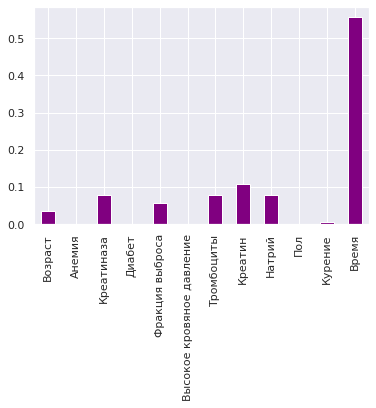

In [33]:
pd.Series(data=tree_importance, index=x.columns).plot(kind='bar', color='purple')

In [34]:
tree_importance = pd.Series(data=tree_importance, index=x.columns)
good_features = tree_importance[tree_importance>0]
list(good_features.index)

['Возраст',
 'Креатиназа',
 'Фракция выброса',
 'Тромбоциты',
 'Креатин',
 'Натрий',
 'Курение',
 'Время']

In [35]:
x = data.drop(['Фактор риска'], axis=1)[list(good_features.index)]
y = data['Фактор риска']

from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)
tree_prediction = tree.predict(x_test)

print('accuracy_score', accuracy_score(y_test, tree_prediction))
print('precision_score', precision_score(y_test, tree_prediction))
print('recall_score', recall_score(y_test, tree_prediction))
print('f1_score', f1_score(y_test, tree_prediction, average='macro'))

accuracy_score 0.6555555555555556
precision_score 0.6071428571428571
recall_score 0.4594594594594595
f1_score 0.6267558528428093


2-й метод соседи

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.random.seed(42)

x = data.drop(['Фактор риска'], axis=1) 
y = data['Фактор риска']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)

print('accuracy_score', accuracy_score(y_test, knn_pred))
print('precision_score', precision_score(y_test, knn_pred))
print('recall_score', recall_score(y_test, knn_pred))
print('f1_score', f1_score(y_test, knn_pred, average='macro'))

accuracy_score 0.5444444444444444
precision_score 0.35714285714285715
recall_score 0.13513513513513514
f1_score 0.439124487004104


Подключим библиотеку MinMaxScaler, чтобы ввести рамки от 0 до 1 для каждой из переменных

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
np.random.seed(42)

x = data.drop(['Фактор риска'], axis=1) 
y = data['Фактор риска']

scaler = MinMaxScaler()
scaler.fit(x)
x_transformed = scaler.transform(x)
x_transformed

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3)

knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)

print('accuracy_score', accuracy_score(y_test, knn_pred))
print('precision_score', precision_score(y_test, knn_pred))
print('recall_score', recall_score(y_test, knn_pred))
print('f1_score', f1_score(y_test, knn_pred, average='macro'))

accuracy_score 0.6
precision_score 0.5454545454545454
recall_score 0.16216216216216217
f1_score 0.4886363636363637


3-й метод - логистическая регрессия

In [38]:
from sklearn.linear_model import LogisticRegression
import numpy as np
np.random.seed(42)

x = data.drop(['Фактор риска'], axis=1)
y = data['Фактор риска']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Ir = LogisticRegression(C=1).fit(x_train, y_train)
Ir_pred = Ir.predict(x_test)

print('accuracy_score', accuracy_score(y_test, Ir_pred))
print('precision_score', precision_score(y_test, Ir_pred))
print('recall_score', recall_score(y_test, Ir_pred))
print('f1_score', f1_score(y_test, Ir_pred, average='macro'))

accuracy_score 0.8
precision_score 0.88
recall_score 0.5945945945945946
f1_score 0.7785675232367413


4-й метод - градиентный бустинг

In [39]:
from xgboost import XGBClassifier
import numpy as np
np.random.seed(42)

x = data.drop(['Фактор риска'], axis=1) 
y = data['Фактор риска']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

xgb_model = XGBClassifier(max_depth=4, n_estimators=1000, learning_rate=0.0088).fit(x_train, y_train)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print('accuracy_score', accuracy_score(y_test, xgb_pred))
print('precision_score', precision_score(y_test, xgb_pred))
print('recall_score', recall_score(y_test, xgb_pred))
print('f1_score', f1_score(y_test, xgb_pred, average='macro'))

accuracy_score 0.7444444444444445
precision_score 0.7692307692307693
recall_score 0.5405405405405406
f1_score 0.7191697191697192


Проведём полный перебор в определённых данных

In [40]:
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials
import numpy as np
np.random.seed(42)

x = data.drop(['Фактор риска'], axis=1) 
y = data['Фактор риска']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


params_space = {
    'learning_rate':    hp.uniform('learning_rate', 0.0001 , 0.25),
    'max_depth':        hp.choice('max_depth', np.arange(4, 25, 1, dtype=int)),
    'n_estimators':     hp.choice('n_estimators', np.array([25, 50, 100, 250, 500, 750, 1000]))
    }

def minimize_function(args):
  xgb_model = XGBClassifier(**args)
  xgb_model.fit(x_train, y_train)
  y_predict = xgb_model.predict(x_test)
  score = f1_score(y_test, y_predict)
  return 1 - score

trials = Trials()
results = fmin(fn=minimize_function, space=params_space, 
               algo=tpe.suggest, max_evals=200, trials=trials)

100%|██████████| 200/200 [00:26<00:00,  7.58it/s, best loss: 0.25373134328358204]


In [41]:
trials.best_trial

{'book_time': datetime.datetime(2022, 1, 11, 14, 48, 21, 852000),
 'exp_key': None,
 'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'idxs': {'learning_rate': [58], 'max_depth': [58], 'n_estimators': [58]},
  'tid': 58,
  'vals': {'learning_rate': [0.050789990555628925],
   'max_depth': [10],
   'n_estimators': [5]},
  'workdir': None},
 'owner': None,
 'refresh_time': datetime.datetime(2022, 1, 11, 14, 48, 22, 28000),
 'result': {'loss': 0.25373134328358204, 'status': 'ok'},
 'spec': None,
 'state': 2,
 'tid': 58,
 'version': 0}

In [42]:
np.arange(4, 25, 1, dtype=int)[0]

4

In [43]:
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials

x = data.drop(['Фактор риска'], axis=1) 
y = data['Фактор риска']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


params_space = {
    'learning_rate':    hp.uniform('learning_rate', 0.0001 , 0.25),
    'max_depth':        hp.choice('max_depth', np.arange(4, 25, 1, dtype=int)),
    'n_estimators':     hp.choice('n_estimators', np.array([25, 50, 100, 250, 500, 750, 1000]))
    }

def minimize_function(args):
  xgb_model = XGBClassifier(**args)
  xgb_model.fit(x_train, y_train)
  y_predict = xgb_model.predict(x_test)
  score = f1_score(y_test, y_predict)
  return 1 - score

trials = Trials()
results = fmin(fn=minimize_function, space=params_space, 
               algo=tpe.suggest, max_evals=200, trials=trials)

100%|██████████| 200/200 [00:13<00:00, 14.34it/s, best loss: 0.18518518518518523]


Сделаем табличку похожую на данную, но теперь для наших клиентов

In [44]:
counter = 0
machine = pd.DataFrame(columns=['Имя','Возраст','Пол','Курение','Высокое кровяное давление','Анемия','Диабет','Фракция выброса'
,'Креатин','Креатиназа','Натрий','Тромбоциты','Время'])
new_patients = pd.DataFrame(columns=['Имя','Возраст','Пол','Курение','Высокое кровяное давление','Анемия','Диабет','Фракция выброса'
,'Креатин','Креатиназа','Натрий','Тромбоциты','Время'])

def heath(counter):
    yesno=['да','нет']
    print('Ведите возраст')
    Age= input()
    Age = int(Age)
    if (Age<100 and Age>0):
        new_patients.loc[counter, 'Возраст'] = Age
        machine.loc[counter, 'Возраст'] = Age
    else:
        print('не коректный ответ')

    print ('Имя')

    Name = input()
    new_patients.loc[counter, 'Имя'] = Name
    machine.loc[counter, 'Имя'] = Name
    print('Ваш пол?(муж или жен)')

    gendr= input()
    if gendr in ['муж','жен','вертолет']: # прверка на масив !!!!!!
        new_patients.loc[counter, 'Пол'] =gendr
        machine.loc[counter, 'Пол'] =gendr
    else: 
        print('не коректный ответ')

    print('Высокое давление')              
    High_blood_pressure= input()
    if High_blood_pressure in yesno:
        new_patients.loc[counter, 'Высокое кровяное давление'] =High_blood_pressure
        machine.loc[counter, 'Высокое кровяное давление'] =High_blood_pressure
    else: 
        print('не коректный ответ')
    print('Курит')
    Smok=input()
    if Smok in yesno:
        new_patients.loc[counter, 'Курение'] = Smok
        machine.loc[counter, 'Курение'] = Smok
    else: 
        print('не коректный ответ')
    print('Диабет')
    diabetes = input()
    if diabetes in yesno:
        new_patients.loc[counter, 'Диабет'] =diabetes
        machine.loc[counter, 'Диабет'] =diabetes
    else: 
        print('не коректный ответ')
    print('Анемия')
    anaemia = input()
    if anaemia in yesno:
        new_patients.loc[counter, 'Анемия'] =anaemia
        machine.loc[counter, 'Анемия'] =anaemia
    else: 
        print('не коректный ответ')    
    print('Креатин')  
    serum_creatinine = input()
    new_patients.loc[counter,'Креатин'] =serum_creatinine
    machine.loc[counter,'Креатин'] =serum_creatinine

    print('Креатиназа')
    creatinine_phosphokinase = input()
    new_patients.loc[counter,'Креатиназа'] =creatinine_phosphokinase
    machine.loc[counter,'Креатиназа'] =creatinine_phosphokinase

    print('Фракция выброса')
    ejection_fraction = input()
    new_patients.loc[counter,'Фракция выброса'] =ejection_fraction
    machine.loc[counter,'Фракция выброса'] =ejection_fraction

    print('Тромбоциты')
    platelets = input()
    new_patients.loc[counter,'Тромбоциты'] =platelets
    machine.loc[counter,'Тромбоциты'] =platelets

    print ('Время')
    time = input()
    new_patients.loc[counter,'Время'] =time
    machine.loc[counter, 'Время'] =time

    print ('Натрий')
    sodium=input()
    new_patients.loc[counter,'Натрий'] =sodium
    machine.loc[counter,'Натрий'] =sodium 

    machine['Пол'].replace('муж', 0 ,inplace=True)
    machine['Пол'].replace('жен', 1 ,inplace=True)
    machine['Пол'].replace('вертолет', 0 ,inplace=True)

    machine['Курение'].replace('да', 1 ,inplace=True)
    machine['Курение'].replace('нет', 0 ,inplace=True)

    machine['Диабет'].replace('да', 1 ,inplace=True)
    machine['Диабет'].replace('нет', 0 ,inplace=True)

    machine['Высокое кровяное давление'].replace('да', 1 ,inplace=True)
    machine['Высокое кровяное давление'].replace('нет', 0 ,inplace=True)

    machine['Анемия'].replace('да', 1 ,inplace=True)
    machine['Анемия'].replace('нет', 0 ,inplace=True)

    print(new_patients)
    print(machine)

    counter += 1